In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from datetime import datetime

In [2]:
!uv run python extract_git_history.py -i occupancy.csv -o occupancy_history.csv --start-at be9808b76526d4b8646232e1d63148f10930576b

In [3]:
df = pd.read_csv("occupancy_history.csv", parse_dates=[0])

df["timestamp_utc"] = df.timestamp_utc.dt.tz_localize("UTC")
df["timestamp_cet"] = df.timestamp_utc.dt.tz_convert("Europe/Zurich")
df['hour'] = df['timestamp_cet'].dt.hour
df['dow'] = df['timestamp_cet'].dt.dayofweek  # 0=Mo
df['weekday'] = df['timestamp_cet'].dt.day_name("de_CH")
df['date'] = df['timestamp_cet'].dt.date

In [4]:
# Einträge ausserhalb der Öffnungszeiten entfernen

opening_hours = {
       'Fitnesspark Zürich Stadelhofen': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 9,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Zug Eichstätte': {
           'start_hour': 6,
           'end_hour': 23,
           'start_hour_weekend': 8,
           'end_hour_weekend': 21,
       },
       'Fitnesspark Greifensee Milandia': {
           'start_hour': 8,
           'end_hour': 22,
           'start_hour_weekend': 9,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Regensdorf': {
           'start_hour': 8,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Winterthur': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Zürich Glattpark': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Zürich Puls 5': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 9,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Zürich Sihlcity': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 9,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Zürich Stockerhof': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Luzern National': {
           'start_hour': 7,
           'end_hour': 23,
           'start_hour_weekend': 8,
           'end_hour_weekend': 22,
       },
       'Fitnesspark Luzern Allmend': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Baden Trafo': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 9,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Basel Heuwaage': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 9,
           'end_hour_weekend': 19,
       },
       'Fitnesspark Bern City': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 20,
       },
       'Fitnesspark Oberhofen': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 18,
       },
       'Fitnesspark Ostermundigen Time-Out': {
           'start_hour': 6,
           'end_hour': 22,
           'start_hour_weekend': 8,
           'end_hour_weekend': 20,
       },
}

df['start_hour'] = np.nan
df['end_hour'] = np.nan

studios = df['gym'].unique()

for studio in studios:
    df.loc[((df['gym'] == studio) & (df.dow < 5)), "start_hour"] = opening_hours[studio]['start_hour']
    df.loc[((df['gym'] == studio) & (df.dow < 5)), "end_hour"] = opening_hours[studio]['end_hour']
    df.loc[((df['gym'] == studio) & (df.dow >= 5)), "start_hour"] = opening_hours[studio]['start_hour_weekend']
    df.loc[((df['gym'] == studio) & (df.dow >= 5)), "end_hour"] = opening_hours[studio]['end_hour_weekend']


df = df[(df.hour >= df.start_hour) & (df.hour <= df.end_hour)]

# remove today, since today data is most probably not complete
df = df[(df.date < datetime.now().date())]

df

,timestamp_utc,url,training_area_m2,gym,occupancy,timestamp_cet,hour,dow,weekday,date,start_hour,end_hour
0,2025-03-23 18:25:14.228670+00:00,https://www.fitnesspark.ch/fitnessparks/zueric...,600.0,Fitnesspark Zürich Stadelhofen,105.0,2025-03-23 19:25:14.228670+01:00,19,6,Sonntag,2025-03-23,9.0,20.0
1,2025-03-23 18:25:23.270648+00:00,https://www.fitnesspark.ch/fitnessparks/zug-ei...,1341.0,Fitnesspark Zug Eichstätte,171.0,2025-03-23 19:25:23.270648+01:00,19,6,Sonntag,2025-03-23,8.0,21.0
2,2025-03-23 18:25:30.989067+00:00,https://www.fitnesspark.ch/fitnessparks/greife...,734.0,Fitnesspark Greifensee Milandia,58.0,2025-03-23 19:25:30.989067+01:00,19,6,Sonntag,2025-03-23,9.0,20.0
3,2025-03-23 18:25:40.150531+00:00,https://www.fitnesspark.ch/fitnessparks/regens...,553.0,Fitnesspark Regensdorf,109.0,2025-03-23 19:25:40.150531+01:00,19,6,Sonntag,2025-03-23,8.0,20.0
4,2025-03-23 18:25:49.202268+00:00,https://www.fitnesspark.ch/fitnessparks/winter...,1200.0,Fitnesspark Winterthur,89.0,2025-03-23 19:25:49.202268+01:00,19,6,Sonntag,2025-03-23,8.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268169,2026-01-12 22:13:17.171060+00:00,https://www.fitnesspark.ch/fitnessparks/luzern...,863.0,Fitnesspark Luzern National,13.0,2026-01-12 23:13:17.171060+01:00,23,0,Montag,2026-01-12,7.0,23.0
268177,2026-01-12 22:33:57.942355+00:00,https://www.fitnesspark.ch/fitnessparks/zug-ei...,1341.0,Fitnesspark Zug Eichstätte,1.0,2026-01-12 23:33:57.942355+01:00,23,0,Montag,2026-01-12,6.0,23.0
268185,2026-01-12 22:35:00.109012+00:00,https://www.fitnesspark.ch/fitnessparks/luzern...,863.0,Fitnesspark Luzern National,NaN,2026-01-12 23:35:00.109012+01:00,23,0,Montag,2026-01-12,7.0,23.0
268193,2026-01-12 22:49:46.837229+00:00,https://www.fitnesspark.ch/fitnessparks/zug-ei...,1341.0,Fitnesspark Zug Eichstätte,1.0,2026-01-12 23:49:46.837229+01:00,23,0,Montag,2026-01-12,6.0,23.0


In [5]:
# Resampling auf Stundenmittel
hourly = (df.set_index('timestamp_cet')
            .groupby('gym')
            .resample('1H')['occupancy'].mean()
            .dropna()
            .reset_index())

hourly

C:\Users\ods\AppData\Local\Temp\ipykernel_16984\591221030.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')['occupancy'].mean()


,gym,timestamp_cet,occupancy
0,Fitnesspark Baden Trafo,2025-03-23 19:00:00+01:00,30.000000
1,Fitnesspark Baden Trafo,2025-03-24 06:00:00+01:00,15.500000
2,Fitnesspark Baden Trafo,2025-03-24 07:00:00+01:00,21.666667
3,Fitnesspark Baden Trafo,2025-03-24 08:00:00+01:00,30.000000
4,Fitnesspark Baden Trafo,2025-03-24 09:00:00+01:00,58.333333
...,...,...,...
71252,Fitnesspark Zürich Stockerhof,2026-01-12 18:00:00+01:00,281.333333
71253,Fitnesspark Zürich Stockerhof,2026-01-12 19:00:00+01:00,289.000000
71254,Fitnesspark Zürich Stockerhof,2026-01-12 20:00:00+01:00,199.333333
71255,Fitnesspark Zürich Stockerhof,2026-01-12 21:00:00+01:00,96.333333


C:\Users\ods\AppData\Local\Temp\ipykernel_16984\1945405120.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


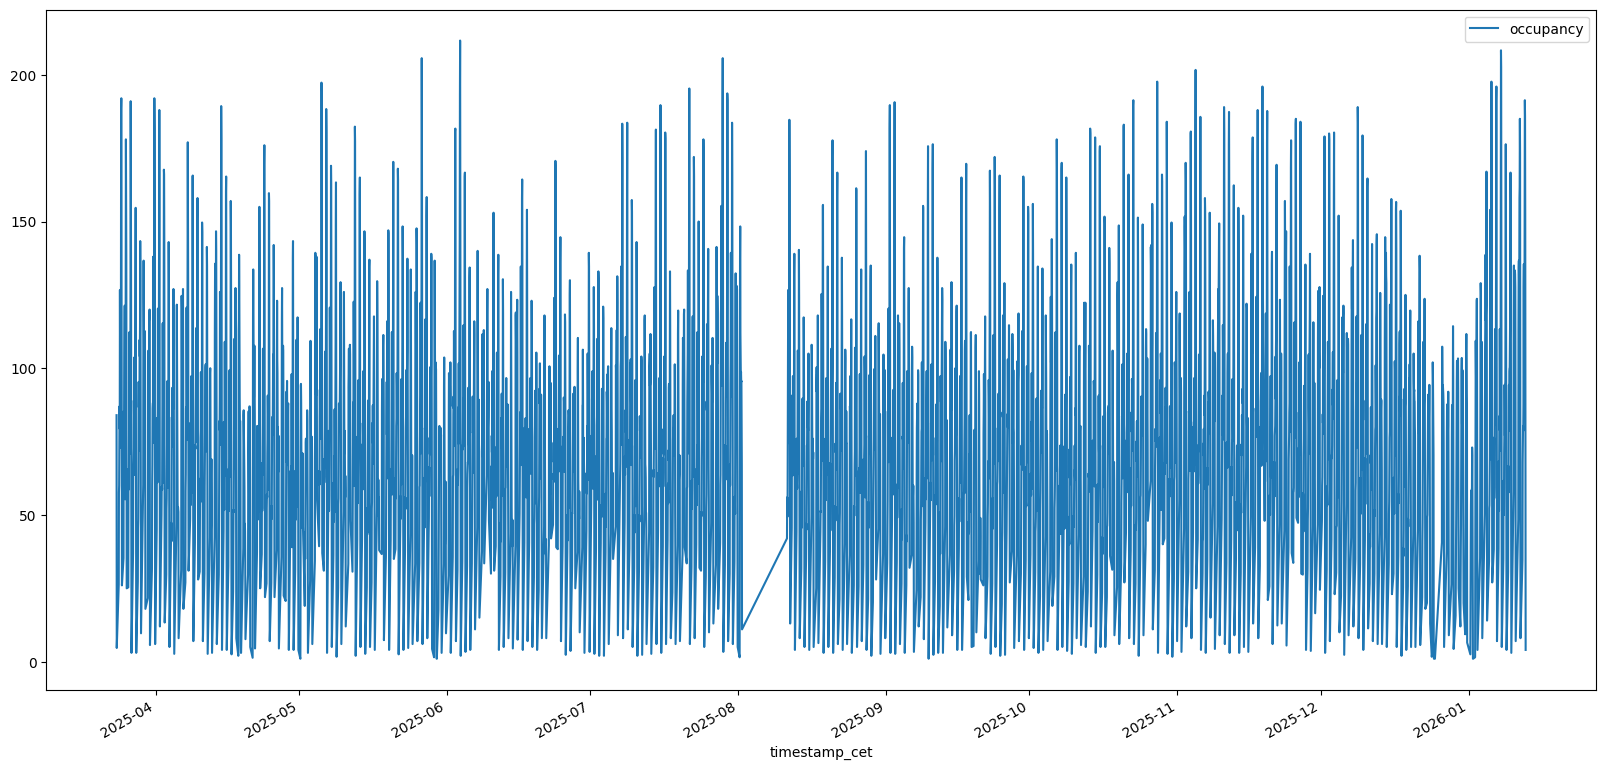

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
df_stadi = hourly[hourly.gym == "Fitnesspark Zürich Stadelhofen"]
df_stadi.plot(kind='line', y='occupancy', x="timestamp_cet", ax=ax)
fig.show()

In [7]:
# Heatmap-Matrix: Durchschnitt je (dow, hour)
heat = (hourly.assign(dow=lambda x: x['timestamp_cet'].dt.dayofweek,
                      weekday=lambda x: x['timestamp_cet'].dt.day_name("de_CH"),
                      hour=lambda x: x['timestamp_cet'].dt.hour)
               .groupby(['gym','dow','weekday', 'hour'])['occupancy']
               .median()
               .reset_index())

heat

,gym,dow,weekday,hour,occupancy
0,Fitnesspark Baden Trafo,0,Montag,6,12.000000
1,Fitnesspark Baden Trafo,0,Montag,7,22.500000
2,Fitnesspark Baden Trafo,0,Montag,8,30.666667
3,Fitnesspark Baden Trafo,0,Montag,9,58.000000
4,Fitnesspark Baden Trafo,0,Montag,10,45.333333
...,...,...,...,...,...
1742,Fitnesspark Zürich Stockerhof,6,Sonntag,16,139.000000
1743,Fitnesspark Zürich Stockerhof,6,Sonntag,17,154.333333
1744,Fitnesspark Zürich Stockerhof,6,Sonntag,18,148.666667
1745,Fitnesspark Zürich Stockerhof,6,Sonntag,19,116.333333


In [8]:
# Mittelwert pro Wochentag und Stunde
agg = df.groupby(['weekday', 'hour'])['occupancy'].mean().reset_index()
agg

,weekday,hour,occupancy
0,Dienstag,6,26.117754
1,Dienstag,7,45.324927
2,Dienstag,8,50.759630
3,Dienstag,9,78.766683
4,Dienstag,10,98.363453
...,...,...,...
115,Sonntag,18,113.837292
116,Sonntag,19,86.409924
117,Sonntag,20,40.427542
118,Sonntag,21,64.931330


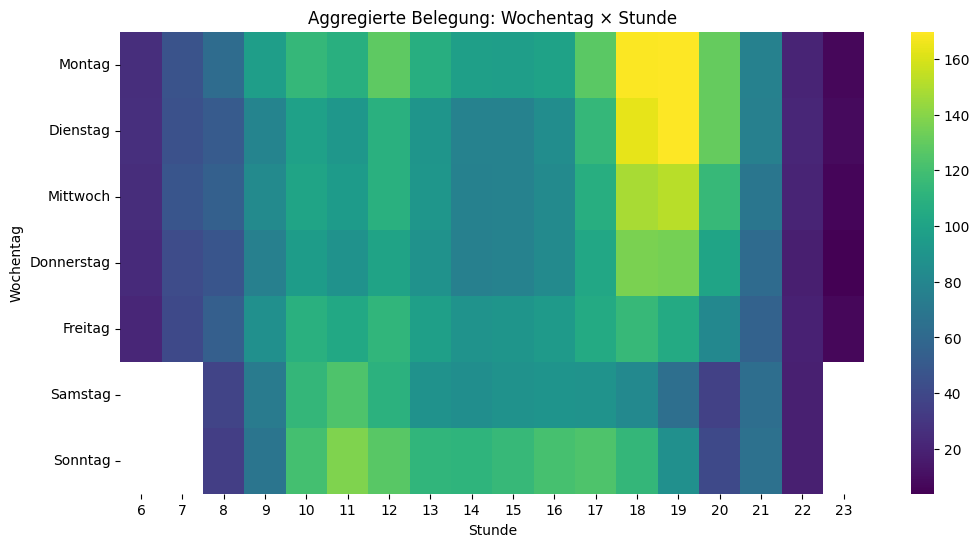

In [9]:
# Wochentage in richtiger Reihenfolge
order = ['Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag','Sonntag']
pivot_agg = agg.pivot(index='weekday', columns='hour', values='occupancy').reindex(order)

# Heatmap Wochentag × Stunde
plt.figure(figsize=(12,6))
sns.heatmap(pivot_agg, cmap='viridis', annot=False)
plt.title('Aggregierte Belegung: Wochentag × Stunde')
plt.xlabel('Stunde')
plt.ylabel('Wochentag')
plt.show()


In [11]:
# Berechne die "Dichte" pro 100 m² um vergleichbare Werte über alle Studios zu bekommen
df['density_100m2'] = df['occupancy'] / (df['training_area_m2'] / 100)

Text(0.5, 1.0, 'Belegungsdichte (Personen pro 100 m²)')

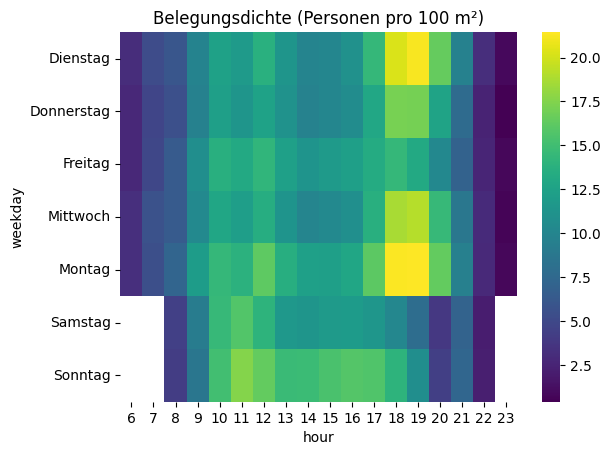

In [12]:
heat = df.groupby(['weekday','hour'])['density_100m2'].mean().reset_index()
pivot = heat.pivot(index='weekday', columns='hour', values='density_100m2')
sns.heatmap(pivot, cmap='viridis')
plt.title('Belegungsdichte (Personen pro 100 m²)')

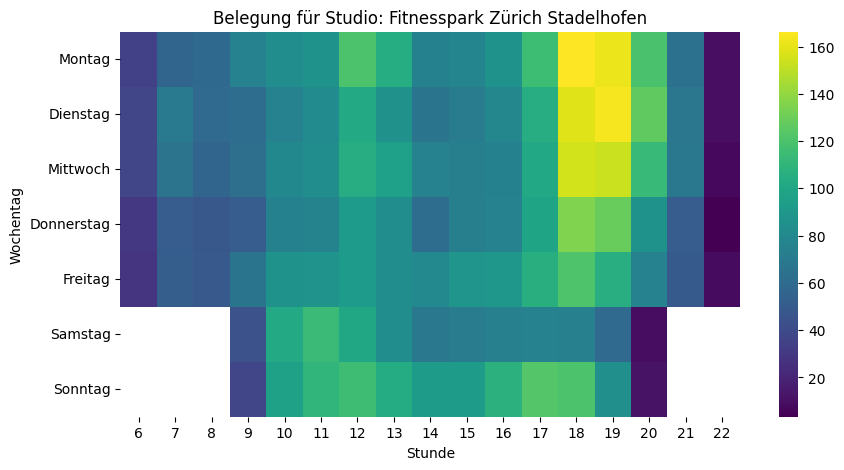

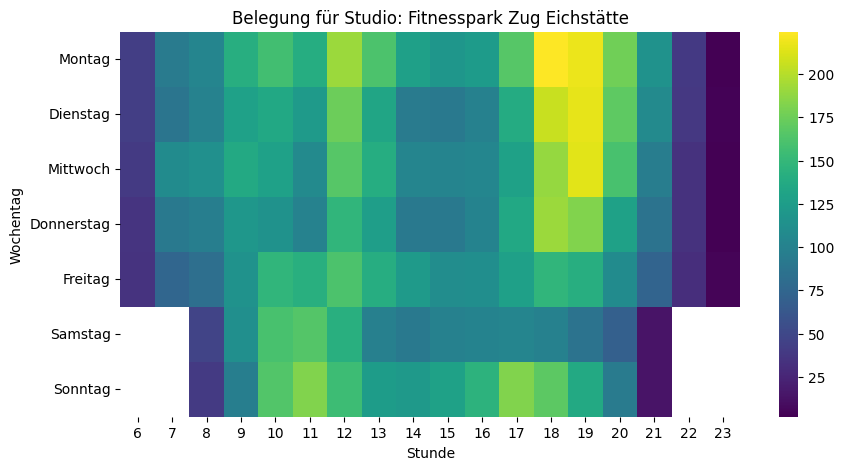

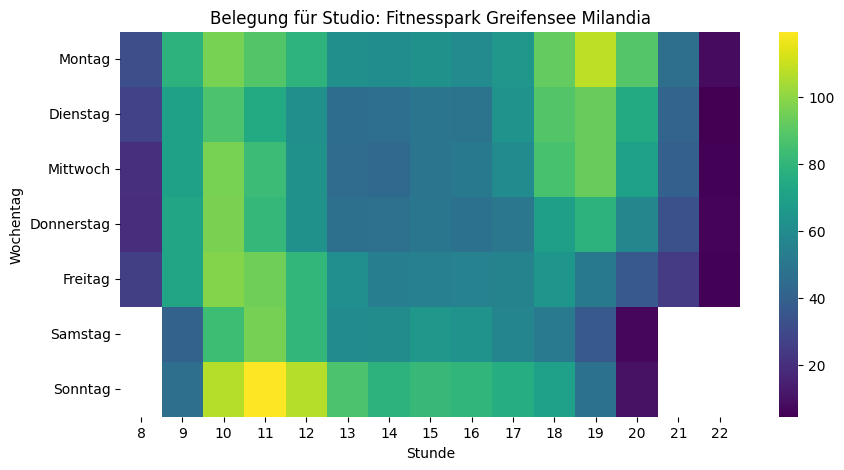

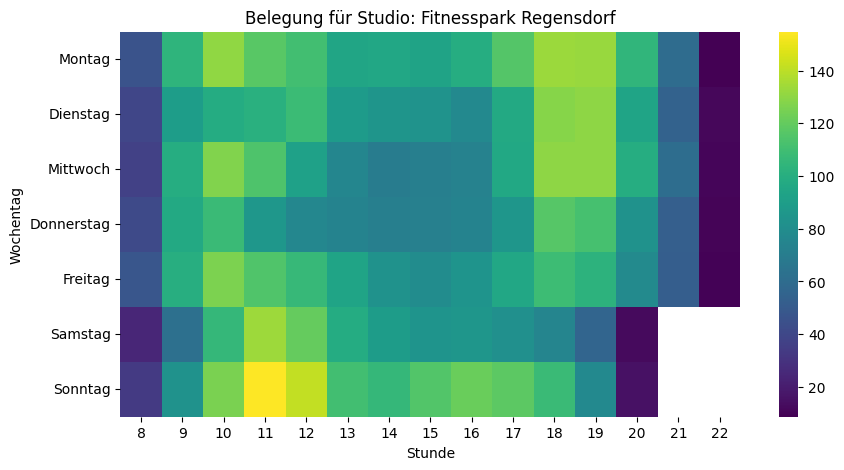

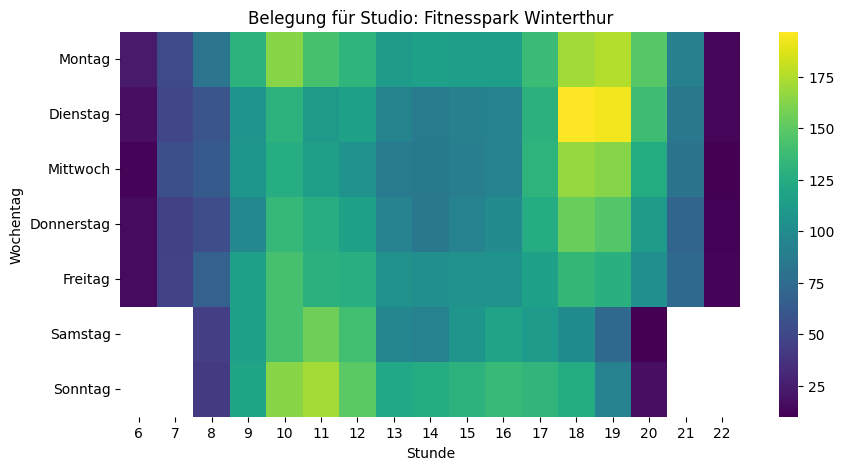

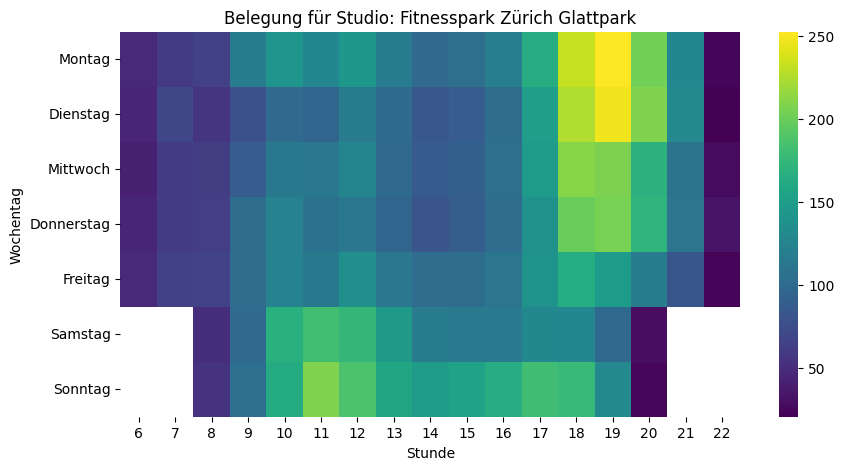

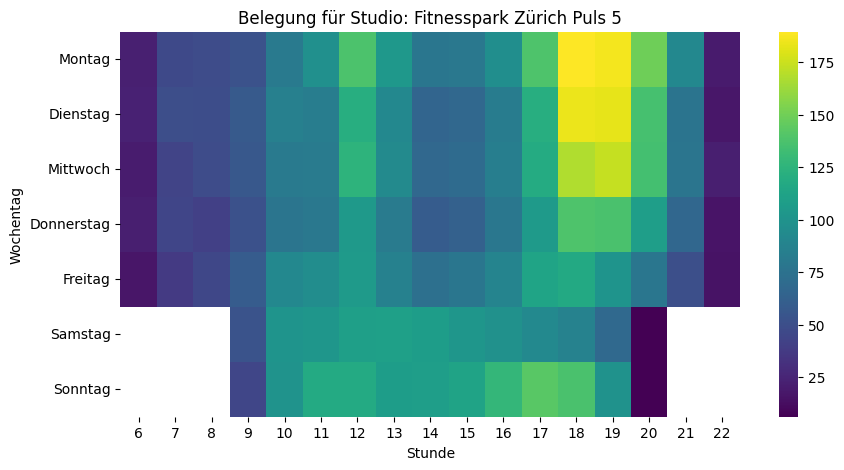

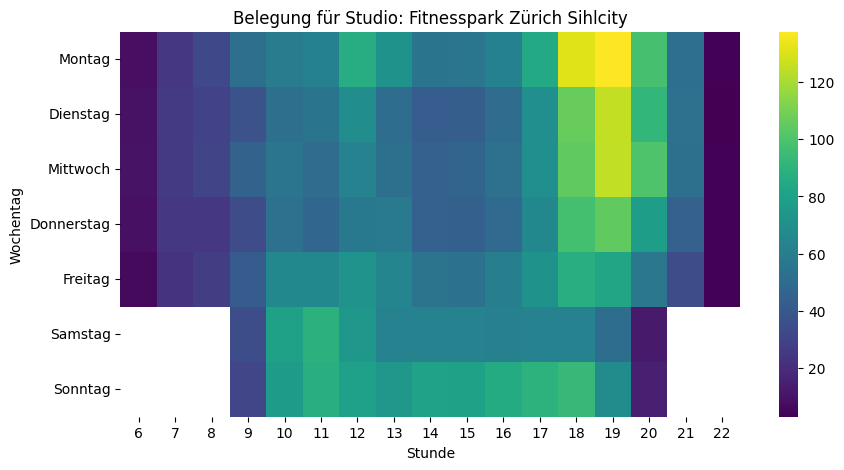

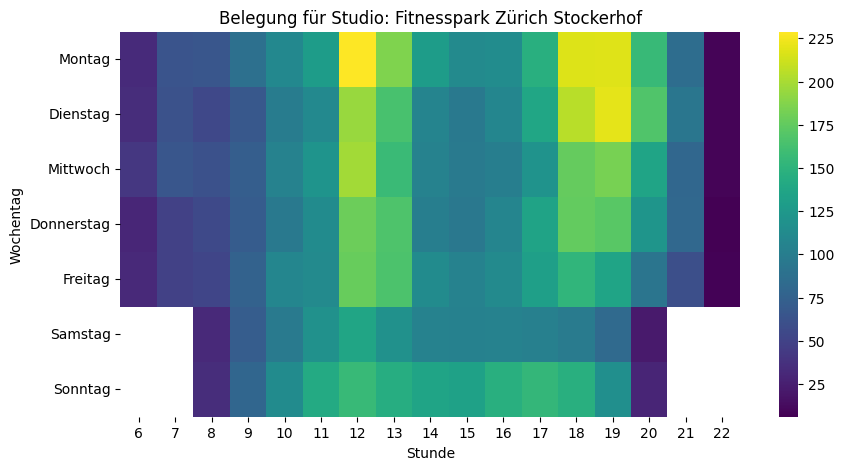

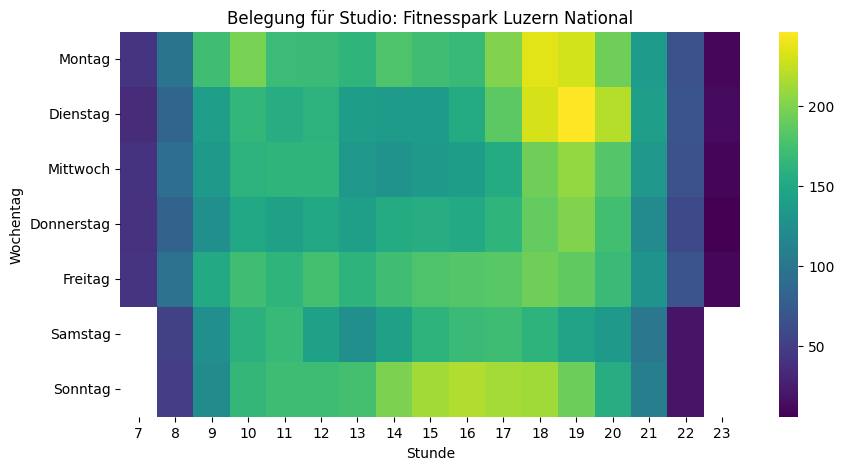

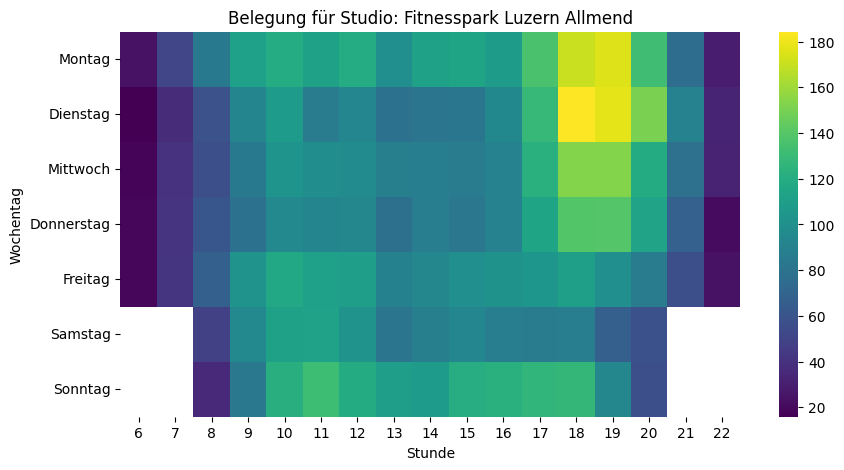

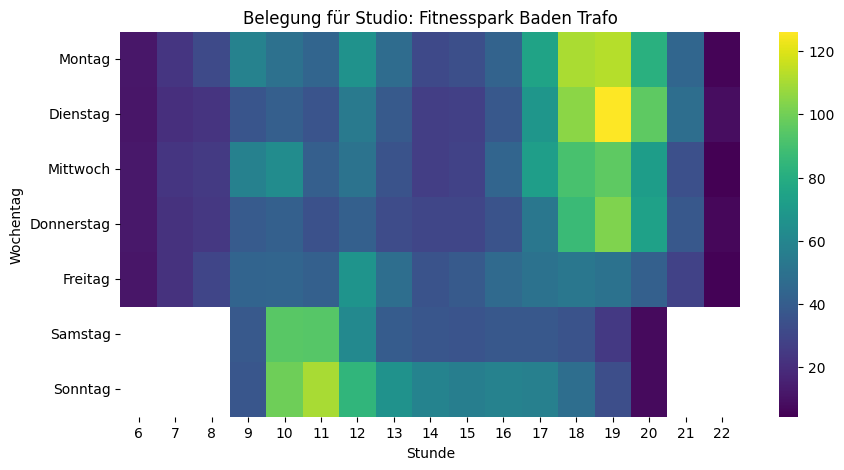

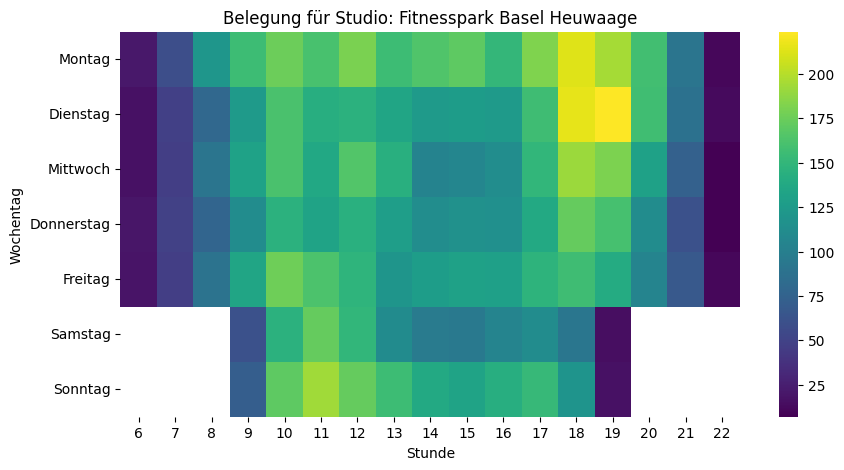

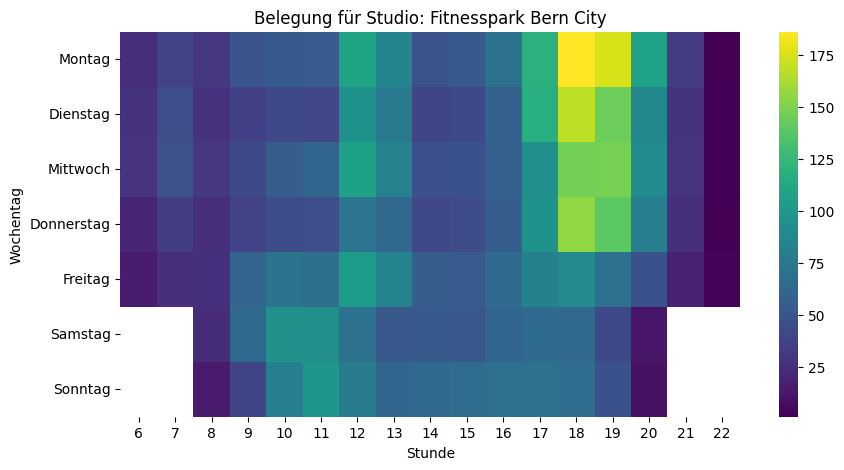

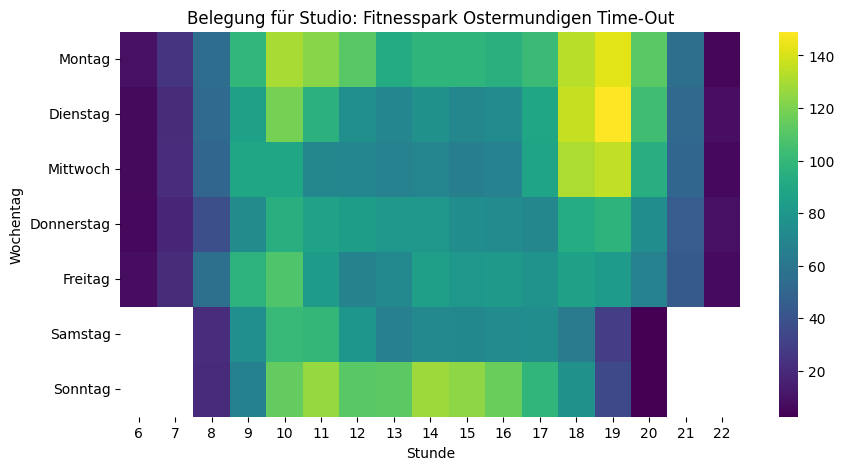

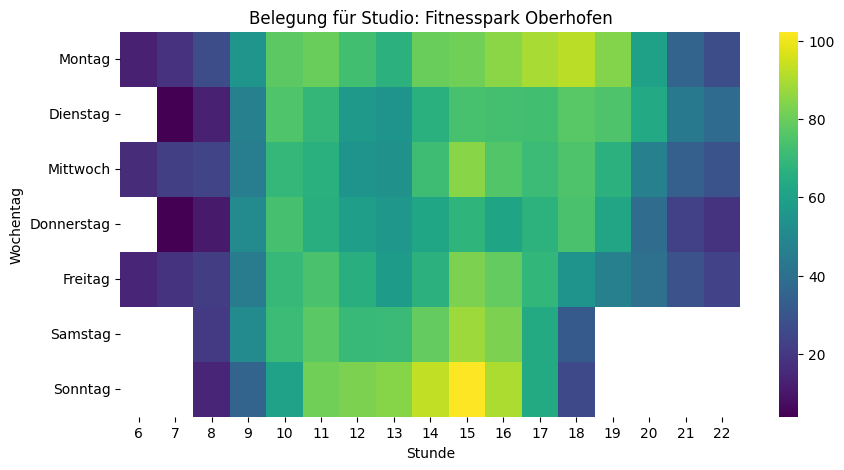

In [13]:
studios = df['gym'].unique()

for studio in studios:
    subset = df[df['gym'] == studio]
    heat = subset.groupby(['weekday','hour'])['occupancy'].mean().reset_index()
    pivot = heat.pivot(index='weekday', columns='hour', values='occupancy').reindex(order)

    plt.figure(figsize=(10,5))
    sns.heatmap(pivot, cmap='viridis', annot=False)
    plt.title(f'Belegung für Studio: {studio}')
    plt.xlabel('Stunde')
    plt.ylabel('Wochentag')
    plt.show()

In [14]:
df['density_100m2'].min()

np.float64(0.07457121551081282)

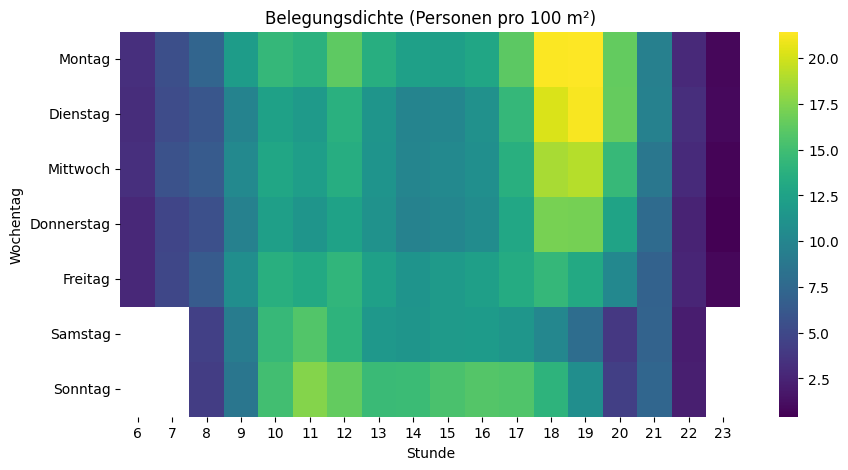

In [15]:
heat_all = df.groupby(['weekday','hour'])['density_100m2'].mean().reset_index()
pivot_all = heat_all.pivot(index='weekday', columns='hour', values='density_100m2').reindex(order)

plt.figure(figsize=(10,5))
sns.heatmap(pivot_all, cmap='viridis', annot=False)
plt.title(f'Belegungsdichte (Personen pro 100 m²)')
plt.xlabel('Stunde')
plt.ylabel('Wochentag')
plt.show()

In [16]:
heat["density_100m2"].min()

KeyError: 'density_100m2'

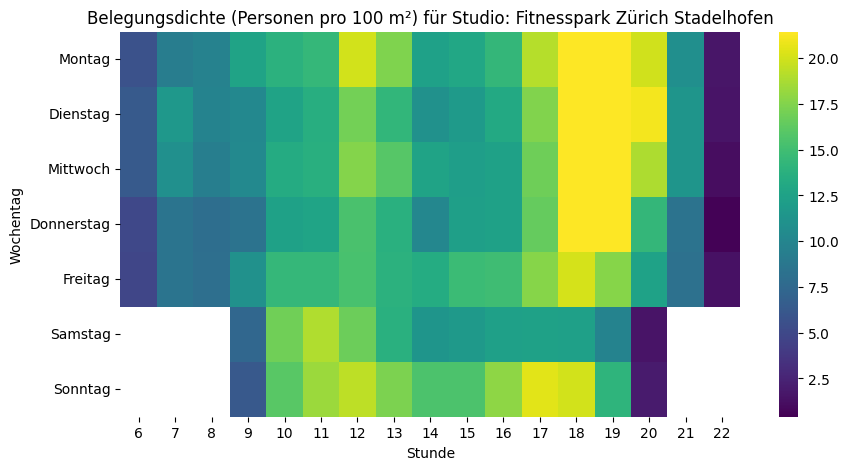

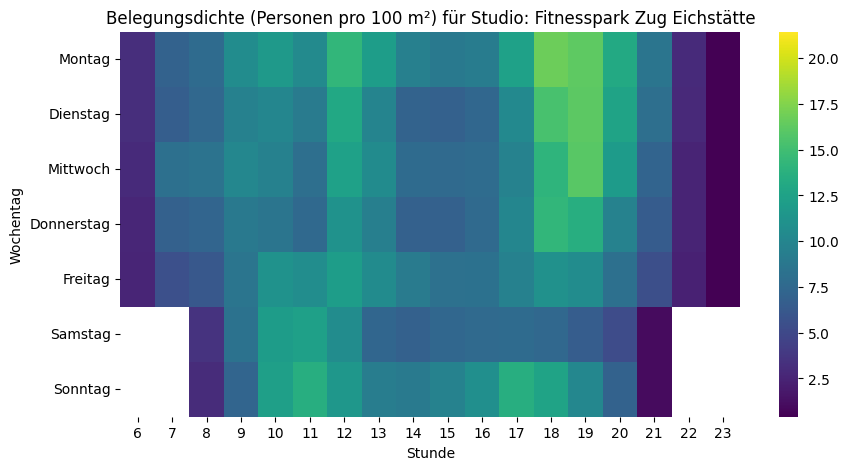

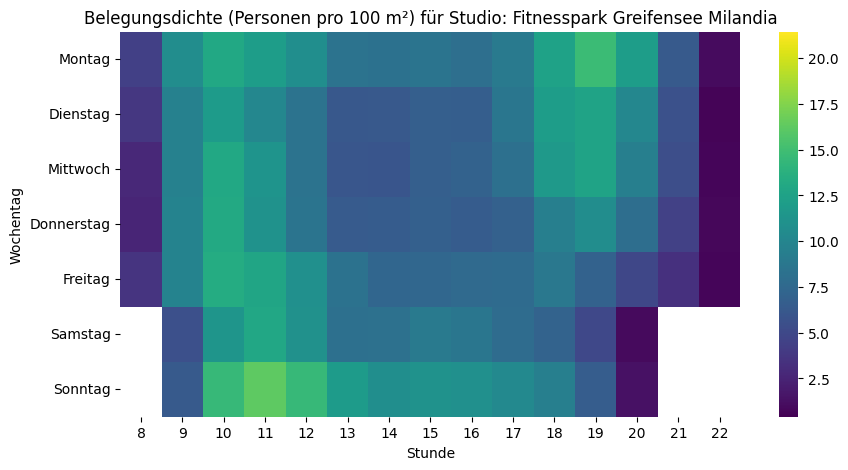

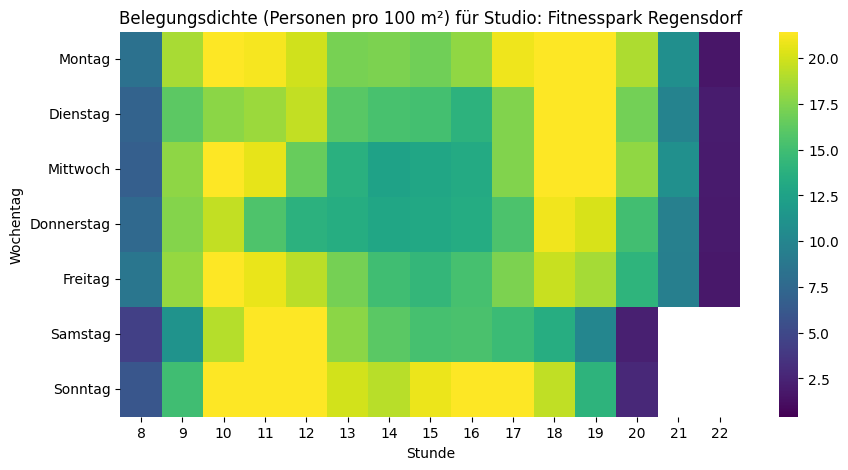

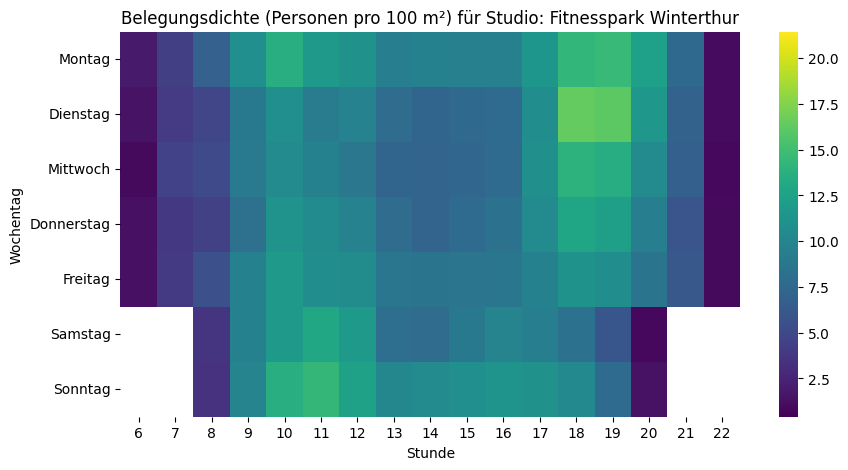

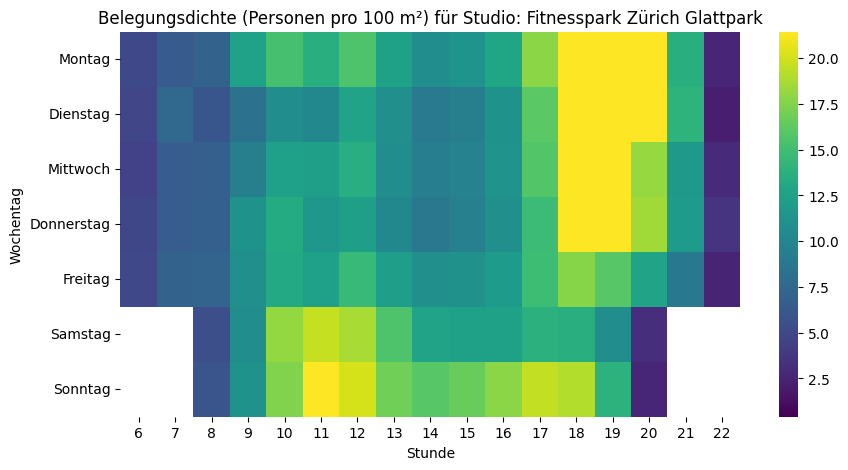

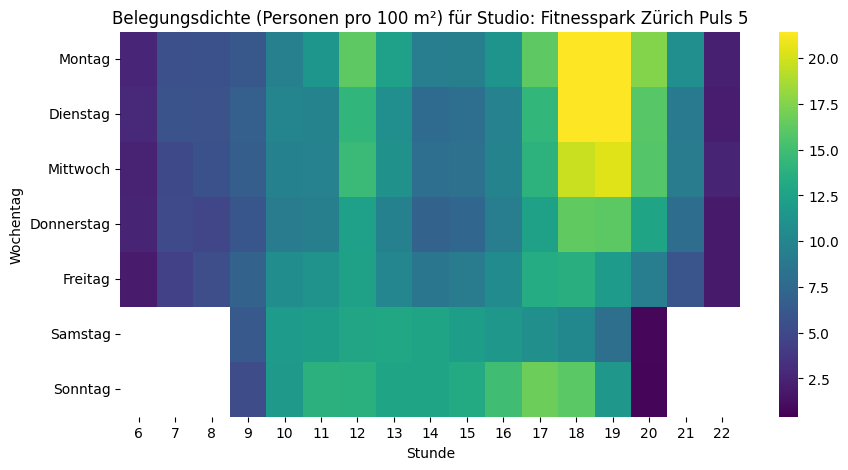

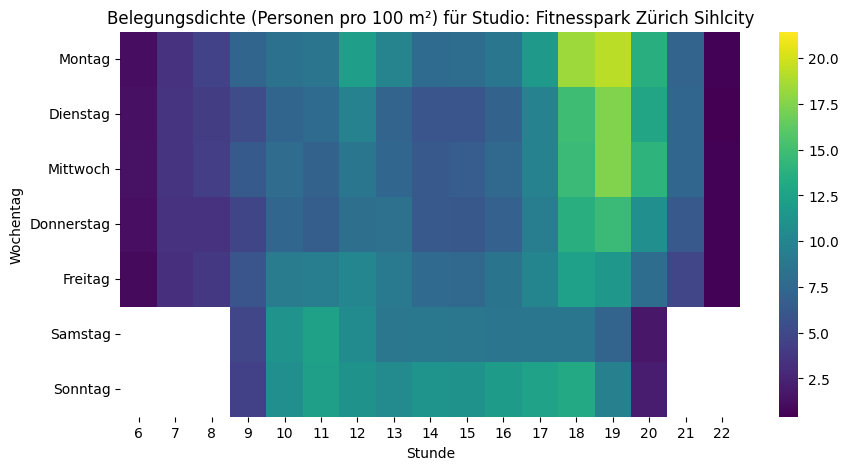

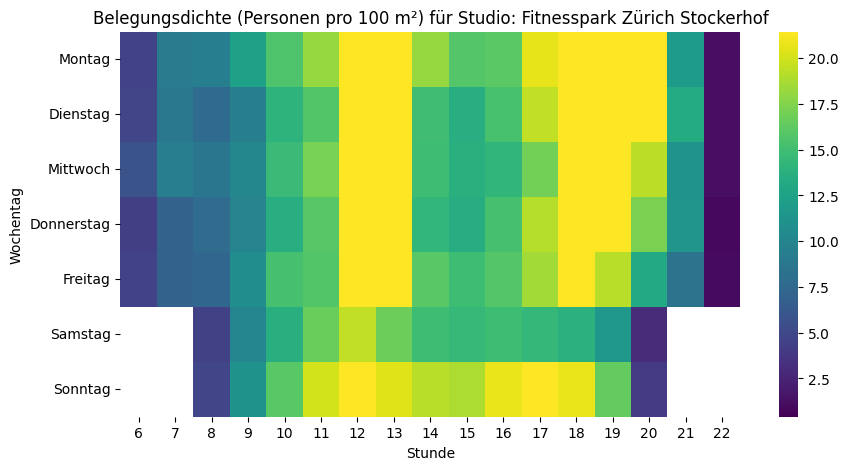

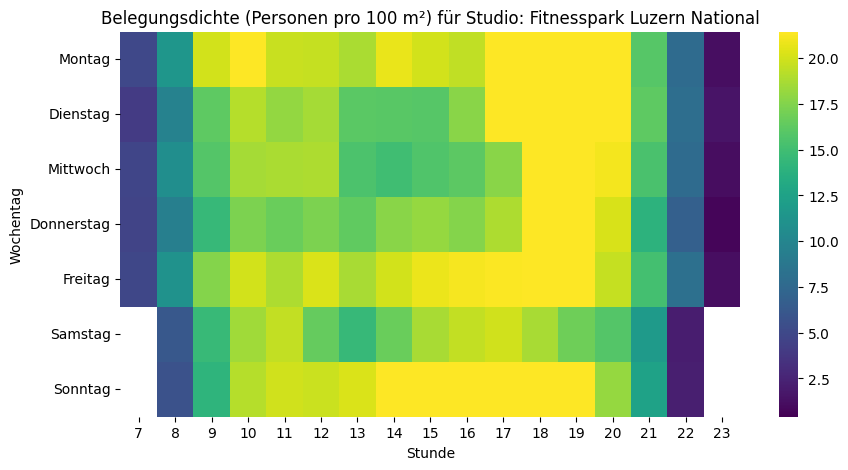

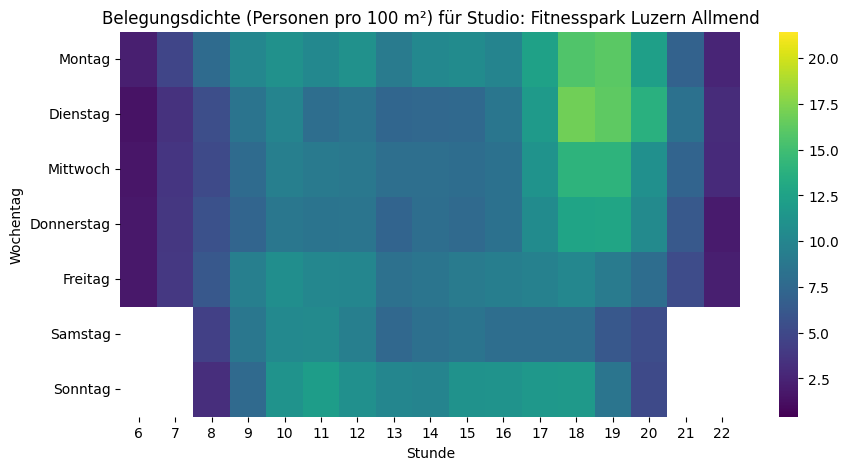

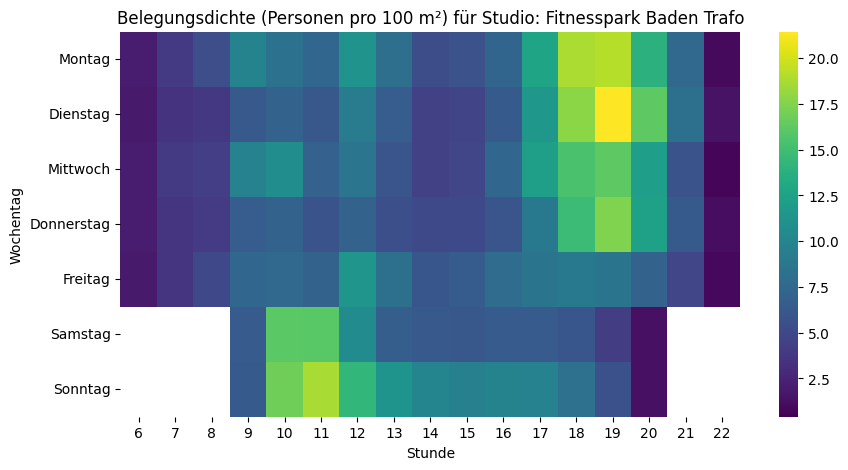

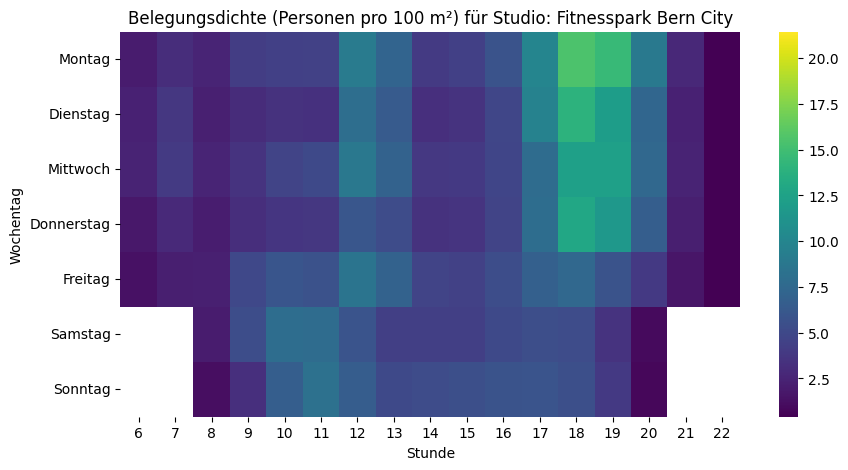

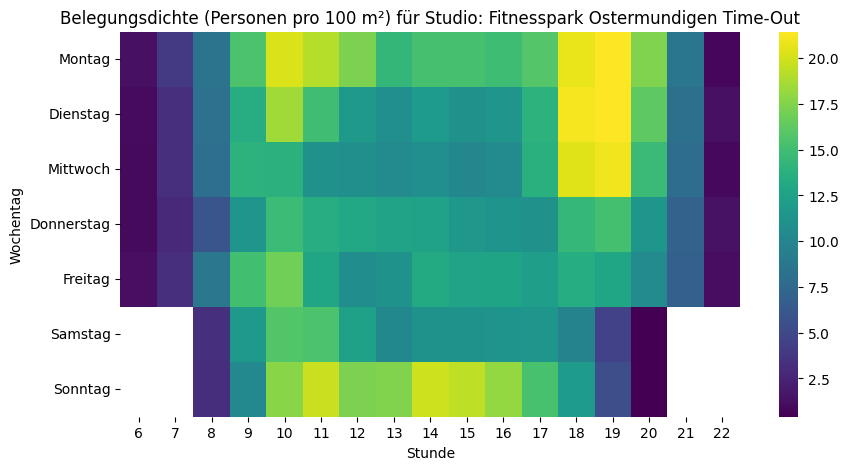

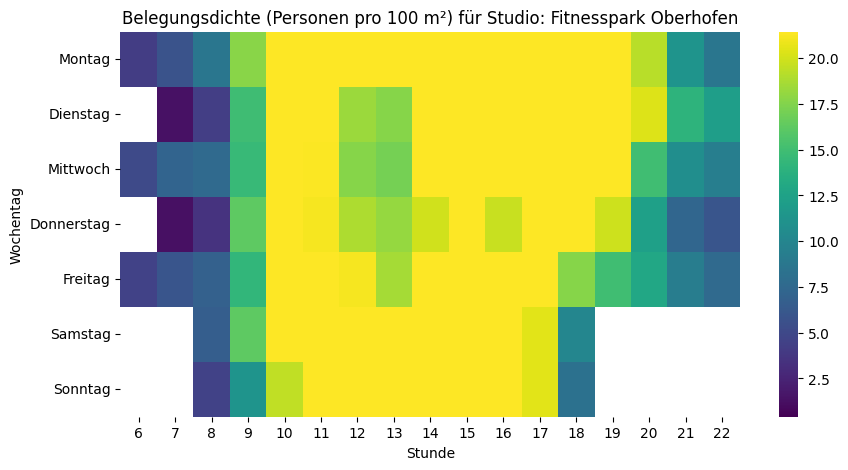

In [17]:
studios = df['gym'].unique()

for studio in studios:
    # keine Fläche für Basel
    if studio == "Fitnesspark Basel Heuwaage":
        continue
    subset = df[df['gym'] == studio]
    heat = subset.groupby(['weekday','hour'])['density_100m2'].mean().reset_index()
    pivot = heat.pivot(index='weekday', columns='hour', values='density_100m2').reindex(order)

    plt.figure(figsize=(10,5))
    sns.heatmap(pivot, cmap='viridis', annot=False, vmin=heat_all["density_100m2"].min(), vmax=heat_all["density_100m2"].max())
    plt.title(f'Belegungsdichte (Personen pro 100 m²) für Studio: {studio}')
    plt.xlabel('Stunde')
    plt.ylabel('Wochentag')
    plt.show()

C:\Users\ods\AppData\Local\Temp\ipykernel_16984\442268597.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


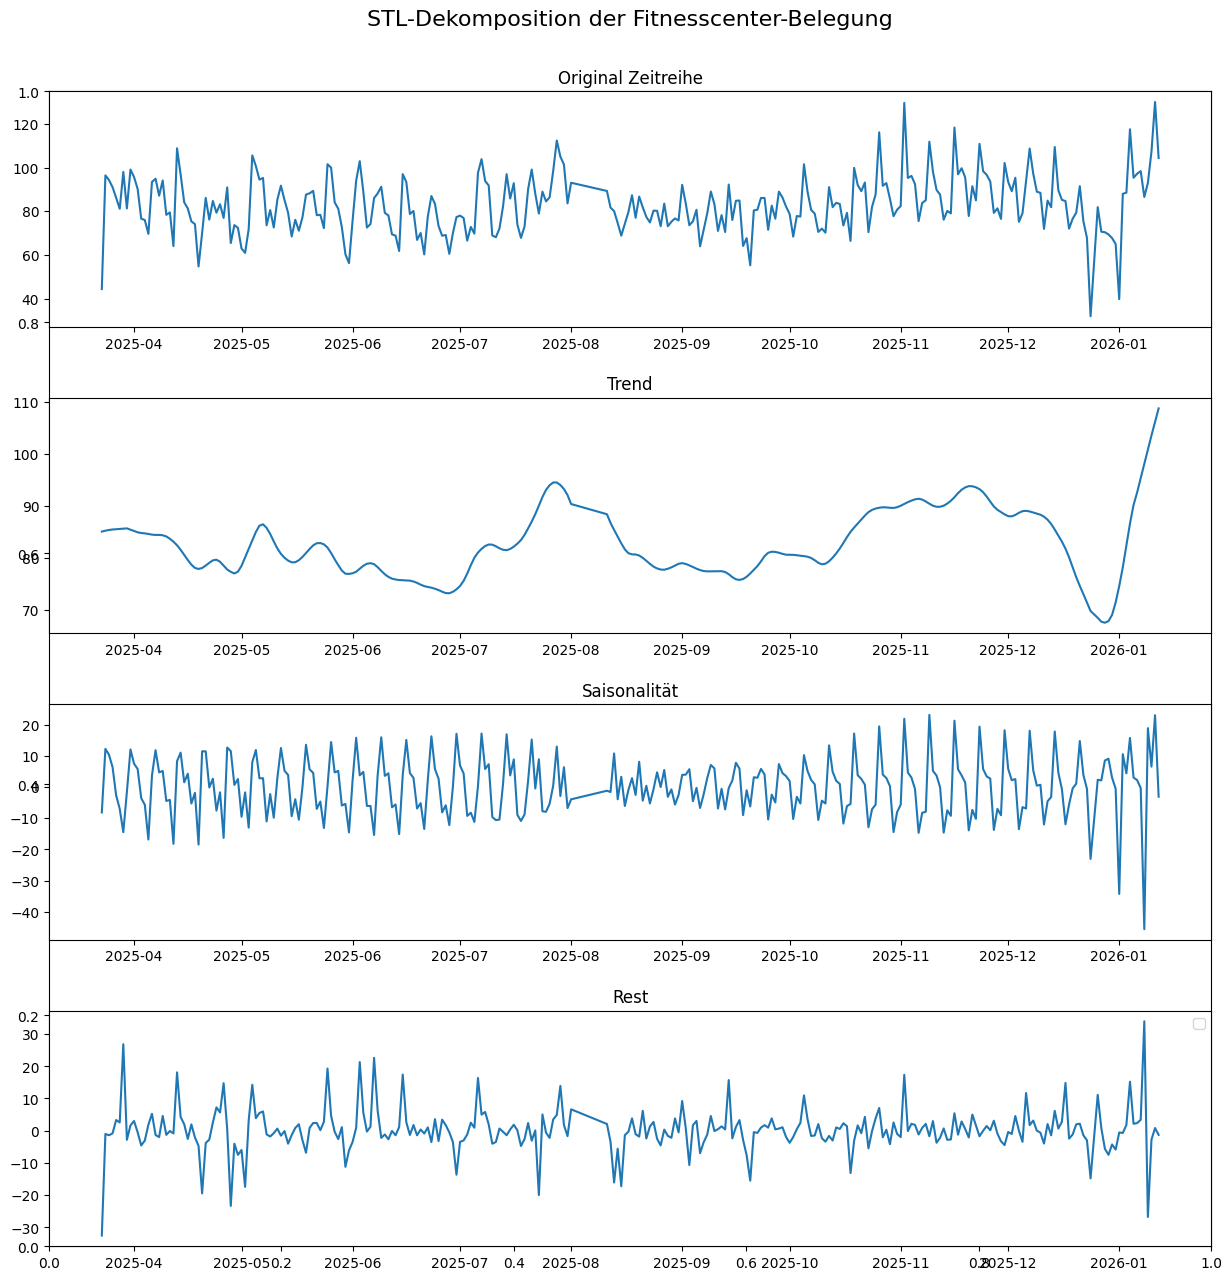

In [60]:
# Aggregation auf Tagesmittelwerte (für klare Saisonalität)
df_stadi = df[df.gym == "Fitnesspark Zürich Stadelhofen"].dropna().reset_index()
daily = df_stadi.groupby('date')['occupancy'].mean()
daily.index = pd.to_datetime(daily.index)

# STL-Dekomposition
# period=7 für Wochenmuster (7 Tage)

stl = STL(daily, period=7, robust=True)
result = stl.fit()

# Zugriff auf Komponenten
trend, seasonal, resid = result.trend, result.seasonal, result.resid

# Resultate plotten
plt.figure(figsize=(15,15))
plt.title('STL-Dekomposition der Fitnesscenter-Belegung', fontsize=16, y=1.05)

plt.subplot(4, 1, 1)
plt.plot(daily)
plt.title('Original Zeitreihe')

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Saisonalität')

plt.subplot(4, 1, 4)
plt.plot(resid)
plt.title('Rest')

plt.subplots_adjust(hspace=0.3)
plt.legend()
plt.show()

In [61]:
daily

date
2025-03-23     44.333333
2025-03-24     96.408163
2025-03-25     94.265306
2025-03-26     90.979592
2025-03-27     86.142857
                 ...    
2026-01-08     86.510204
2026-01-09     92.921569
2026-01-10    107.285714
2026-01-11    130.000000
2026-01-12    104.354167
Name: occupancy, Length: 286, dtype: float64

In [62]:
trend

date
2025-03-23     85.081028
2025-03-24     85.252267
2025-03-25     85.384956
2025-03-26     85.477490
2025-03-27     85.537906
                 ...    
2026-01-08     98.128208
2026-01-09    100.884653
2026-01-10    103.580294
2026-01-11    106.212758
2026-01-12    108.792096
Name: trend, Length: 286, dtype: float64

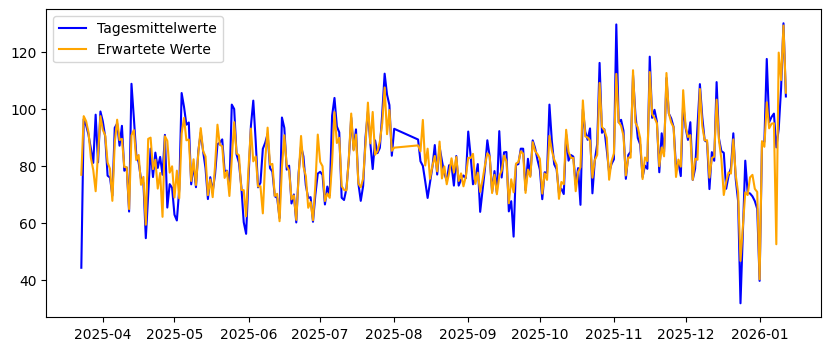

In [ ]:
estimated = trend + seasonal

plt.figure(figsize=(10,4))
plt.plot(daily, label='Tagesmittelwerte', color='blue')
plt.plot(estimated, label='Geschätzte Werte', color='orange')
plt.legend()
plt.show()

In [64]:
resid_mean = resid.mean()
resid_dev = resid.std()

lower = resid_mean - 3*resid_dev
upper = resid_mean + 3*resid_dev



In [65]:
anomalies = daily[(resid < lower) | (resid > upper)]
anomalies

date
2025-03-23     44.333333
2025-03-29     97.969697
2025-04-28     65.428571
2025-06-03    102.897959
2025-06-07     86.000000
2026-01-08     86.510204
2026-01-09     92.921569
Name: occupancy, dtype: float64

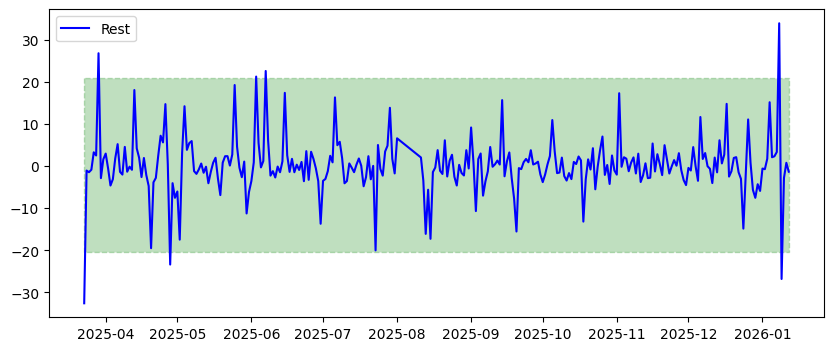

In [66]:
plt.figure(figsize=(10,4))
plt.plot(resid, label='Rest', color='blue')
plt.fill_between([daily.index.min(), daily.index.max()], lower, upper, color="g", alpha=0.25, linestyle="dashed")

plt.legend()
plt.show()

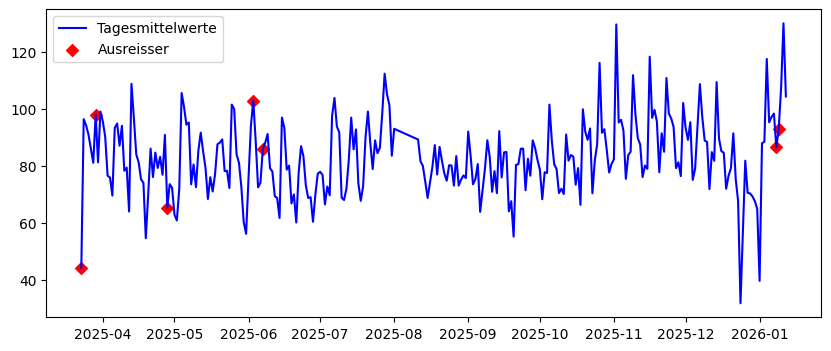

In [67]:
plt.figure(figsize=(10,4))
plt.plot(daily, label='Tagesmittelwerte', color='blue')
plt.scatter(anomalies.index, anomalies.values, color="r", marker="D", label="Ausreisser")
plt.legend()
plt.show()

In [68]:
anomalies

date
2025-03-23     44.333333
2025-03-29     97.969697
2025-04-28     65.428571
2025-06-03    102.897959
2025-06-07     86.000000
2026-01-08     86.510204
2026-01-09     92.921569
Name: occupancy, dtype: float64